# General Machine Learning - Intermediate Level

Welcome to the General Machine Learning intermediate tasks! This notebook contains three comprehensive tasks to test your understanding of feature engineering, ensemble methods, and model optimization.

## Tasks Overview:
1. **Task 1: Feature Engineering and Model Comparison** - Build and compare multiple models
2. **Task 2: Ensemble Methods** - Implement bagging, boosting, and stacking
3. **Task 3: Hyperparameter Tuning** - Optimize model performance

Please refer to `tasks.md` for detailed requirements for each task.

In [1]:
# TODO: Import necessary libraries
# Example:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## Task 1: Feature Engineering and Model Comparison

Build and compare multiple ML models with feature engineering.

**Requirements:**
- Load a dataset (regression or classification)
- Perform feature engineering (scaling, encoding, creating new features)
- Train at least 3 different models
- Compare performance using appropriate metrics
- Perform cross-validation
- Visualize model comparison results

In [2]:
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
y = california_housing.target

print("Dataset loaded successfully!")

# Display the first 5 rows of the dataset
display(df.head())

# Display basic information about the dataset
display(df.info())

# Display descriptive statistics
display(df.describe())

Dataset loaded successfully!


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Data Types and Ranges of Columns

#### Data Types
As observed from the `df.info()` output, all columns in the dataset are of type `float64`. This means they store floating-point numbers, which is appropriate for numerical data such as income, age, and geographical coordinates.

- `MedInc` (Median Income in block group)
- `HouseAge` (Median House Age in block group)
- `AveRooms` (Average number of rooms per household)
- `AveBedrms` (Average number of bedrooms per household)
- `Population` (Block group population)
- `AveOccup` (Average household occupancy)
- `Latitude` (Block group latitude)
- `Longitude` (Block group longitude)
- `MedHouseVal` (Median House Value in 100,000s USD - Target Variable)

#### Ranges of Columns (from `df.describe()`)

Let's look at the minimum, maximum, and mean values for each numerical column to understand their ranges:

-   **`MedInc` (Median Income in block group):**
    -   Min: 0.4999 (approximately $4,999)
    -   Max: 15.0001 (approximately $150,001)
    -   Mean: 3.87 (approximately $38,700)

-   **`HouseAge` (Median House Age in block group):**
    -   Min: 1 year
    -   Max: 52 years
    -   Mean: 28.64 years

-   **`AveRooms` (Average number of rooms per household):**
    -   Min: 0.85
    -   Max: 141.91 (This suggests some block groups might have an unusually high average number of rooms, potentially indicating outliers or specific types of housing arrangements.)
    -   Mean: 5.43

-   **`AveBedrms` (Average number of bedrooms per household):**
    -   Min: 0.33
    -   Max: 34.07 (Similar to `AveRooms`, this maximum value is quite high and could point to outliers.)
    -   Mean: 1.10

-   **`Population` (Block group population):**
    -   Min: 3 people
    -   Max: 35682 people
    -   Mean: 1425 people

-   **`AveOccup` (Average household occupancy):**
    -   Min: 0.69
    -   Max: 1243.33 (This is a significant outlier and requires attention, as such a high occupancy is uncommon for a single household. It could be a data entry error or represent a very unique block group, e.g., a large institutional living facility.)
    -   Mean: 3.07

-   **`Latitude` (Block group latitude):**
    -   Min: 32.54 degrees
    -   Max: 41.95 degrees
    -   Mean: 35.63 degrees

-   **`Longitude` (Block group longitude):**
    -   Min: -124.35 degrees
    -   Max: -114.31 degrees
    -   Mean: -119.57 degrees

-   **`MedHouseVal` (Median House Value in 100,000s USD - Target Variable):**
    -   Min: 0.14999 ($14,999)
    -   Max: 5.00001 ($500,001)
    -   Mean: 2.068558 ($206,856)

It's important to be aware of the wide ranges and potential outliers, especially in `AveRooms`, `AveBedrms`, and `AveOccup`, as these might influence model performance and could require specific handling during feature engineering.

### Visualizing Pairwise Relationships and Distributions

To understand the relationships between different features and their individual distributions, we can use a `pairplot` from the `seaborn` library. This plot creates a grid of scatterplots for each pair of features and histograms for each individual feature.

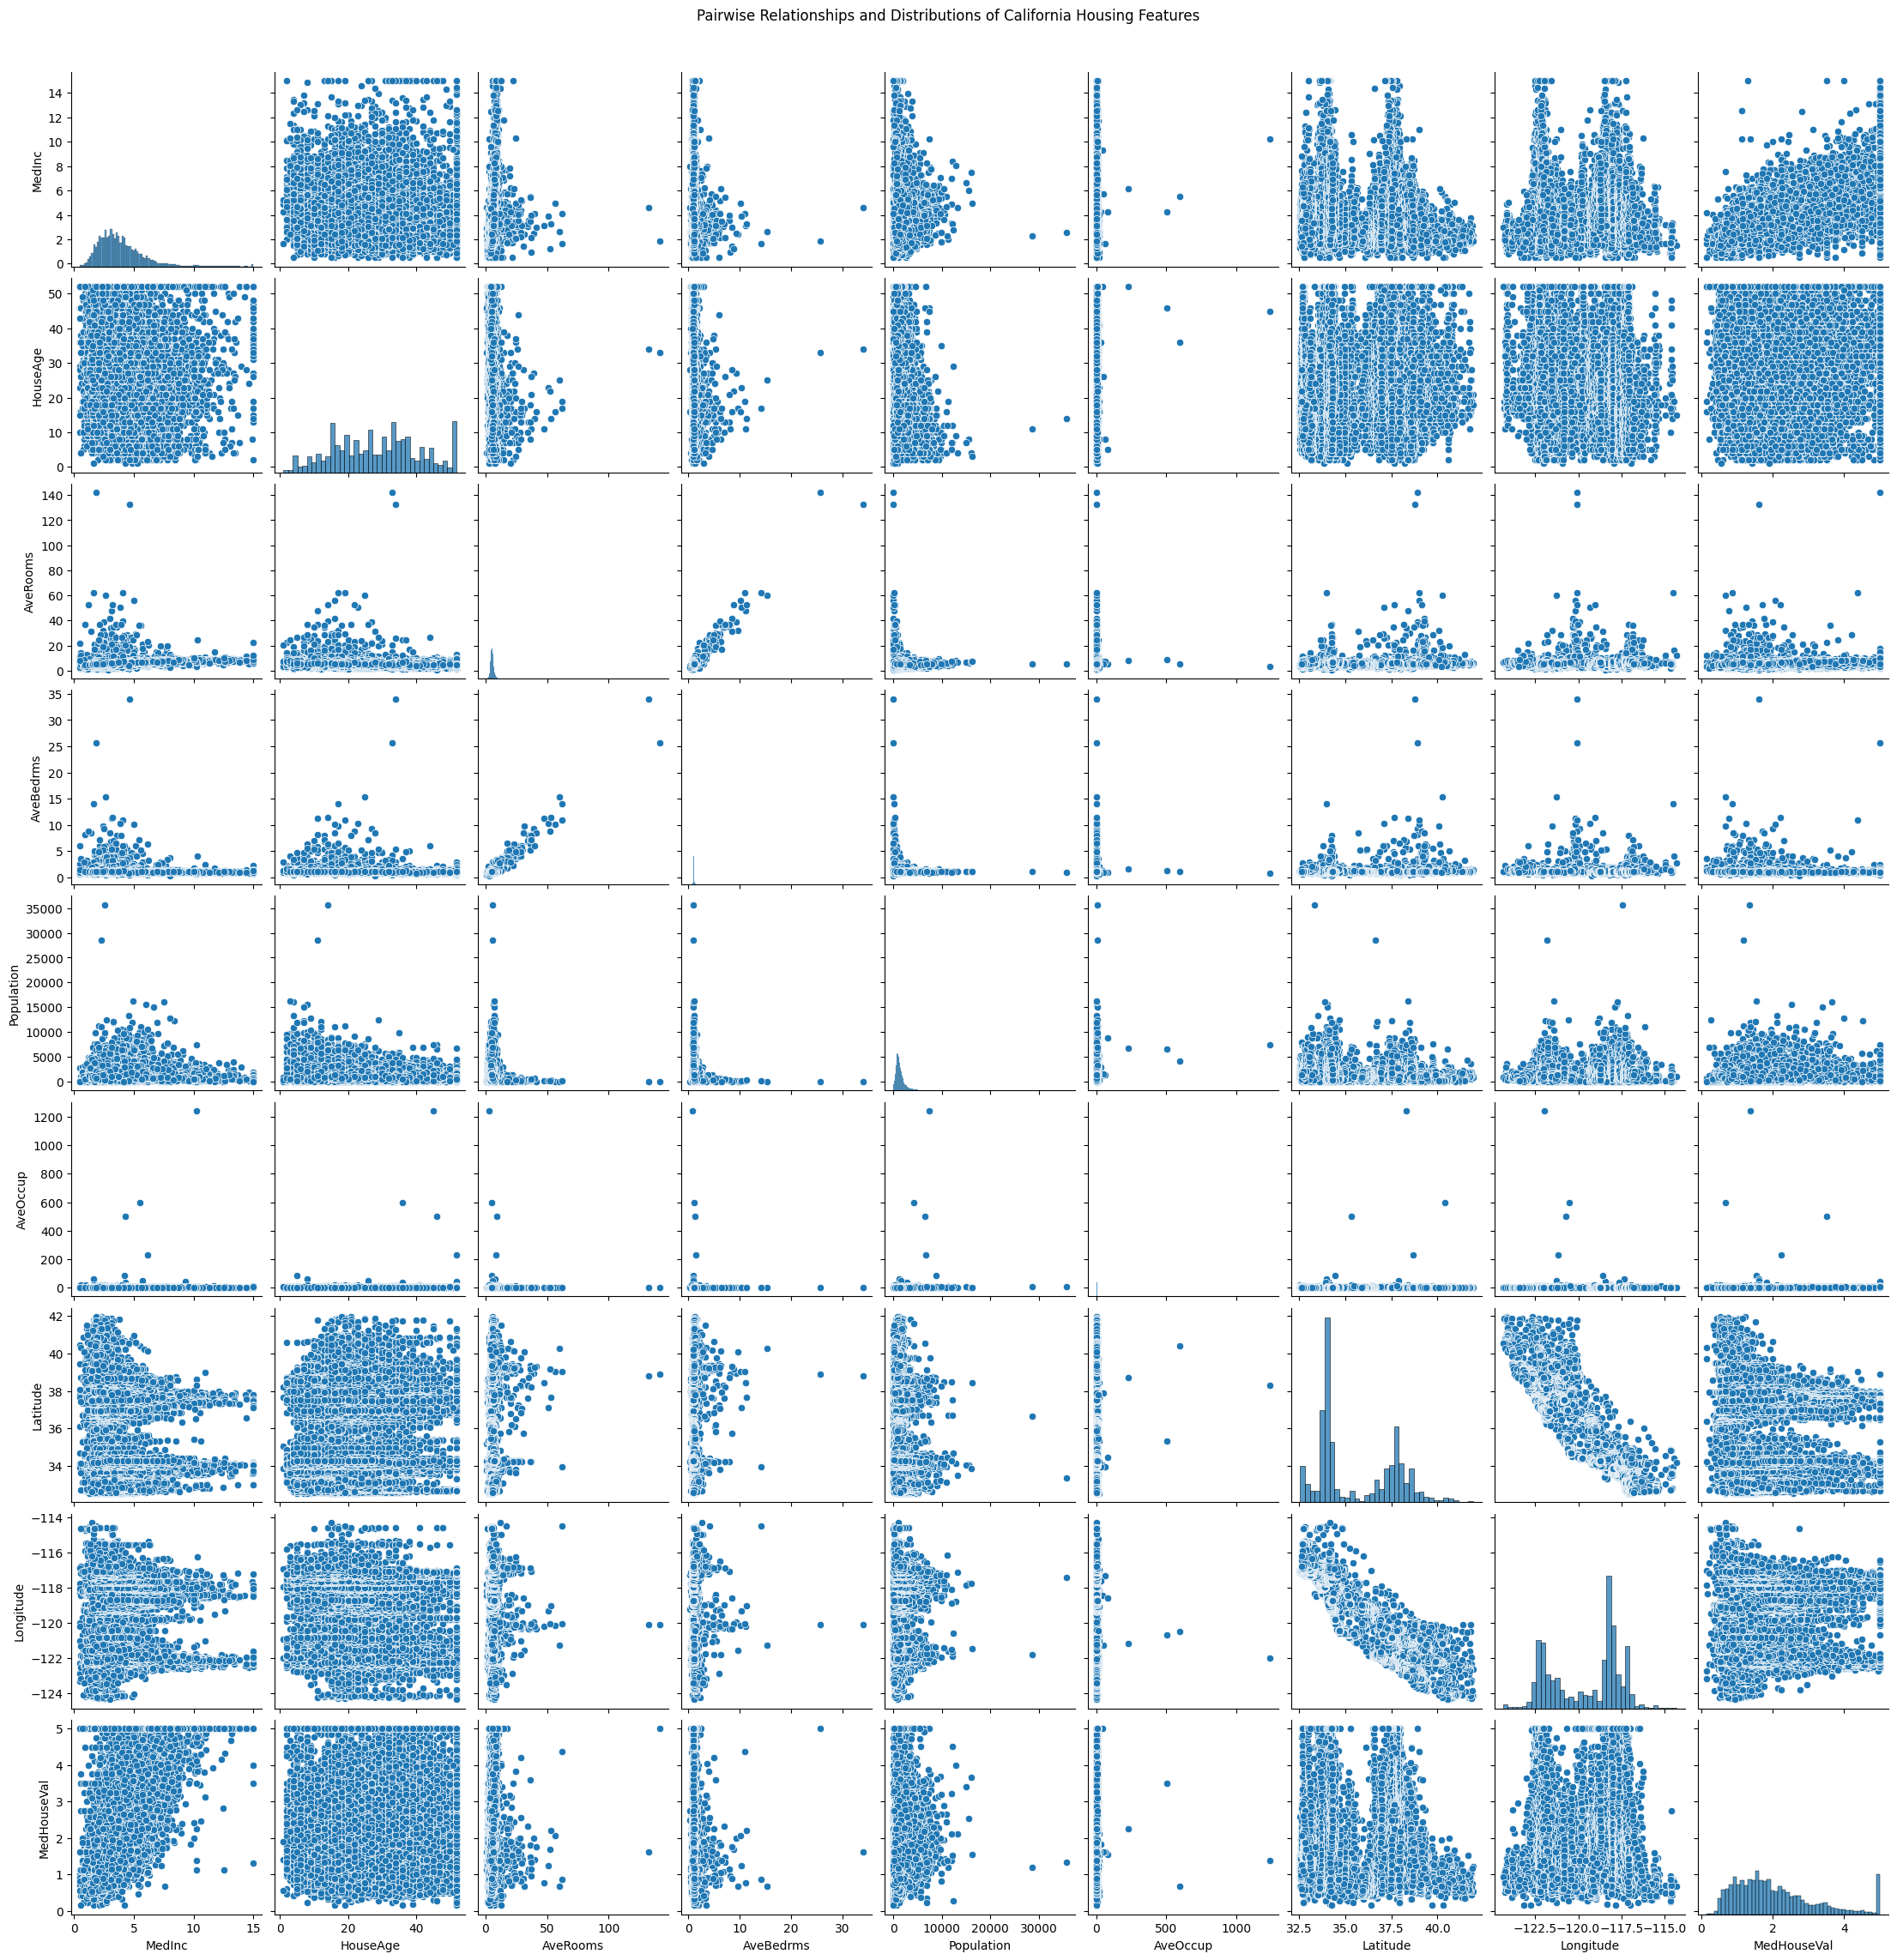

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the DataFrame
# Due to the large number of features and data points, this might take some time to render.
# We are limiting to a subset of the data for faster visualization if needed,
# but for comprehensive analysis, we'll use the full df.

sns.pairplot(df)
plt.suptitle('Pairwise Relationships and Distributions of California Housing Features', y=1.02) # Add a title
plt.show()

In [ ]:
# TODO: Step 2 - Feature engineering


### Feature Engineering: Creating New Features

Based on the analysis of data types, ranges, and initial visualizations, we will create new features that might provide more predictive power to our models. These new features aim to capture more meaningful relationships within the data.

In [4]:
# Create new features
# 1. Bedrooms per Room
df['BedrmsPerRoom'] = df['AveBedrms'] / df['AveRooms']

# 2. Rooms per Person (or per household if AveOccup is viewed as household size)
df['RoomsPerPerson'] = df['AveRooms'] / df['AveOccup']

# 3. Population per Household (Approximation)
df['PopulationPerHousehold'] = df['Population'] / df['AveOccup']

# 4. Interaction feature: Income per Room
df['IncomePerRoom'] = df['MedInc'] * df['AveRooms']

# Display the first few rows with new features
display(df.head())

# Display info to check new columns and their types
display(df.info())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,BedrmsPerRoom,RoomsPerPerson,PopulationPerHousehold,IncomePerRoom
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591,2.732919,126.0,58.144254
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797,2.956685,1138.0,51.785271
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516,2.957661,177.0,60.150315
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458,2.283154,219.0,32.827897
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096,2.879646,259.0,24.161264


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MedInc                  20640 non-null  float64
 1   HouseAge                20640 non-null  float64
 2   AveRooms                20640 non-null  float64
 3   AveBedrms               20640 non-null  float64
 4   Population              20640 non-null  float64
 5   AveOccup                20640 non-null  float64
 6   Latitude                20640 non-null  float64
 7   Longitude               20640 non-null  float64
 8   MedHouseVal             20640 non-null  float64
 9   BedrmsPerRoom           20640 non-null  float64
 10  RoomsPerPerson          20640 non-null  float64
 11  PopulationPerHousehold  20640 non-null  float64
 12  IncomePerRoom           20640 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


None

### Correlation Analysis of New Features

We will now calculate the correlation matrix of the DataFrame, including the newly engineered features, to see how they relate to the target variable (`MedHouseVal`) and other existing features. A heatmap visualization will make these correlations easier to interpret.

Correlation with MedHouseVal (Target Variable):



,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
IncomePerRoom,0.555438
RoomsPerPerson,0.209482
AveRooms,0.151948
HouseAge,0.105623
PopulationPerHousehold,0.065843
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967


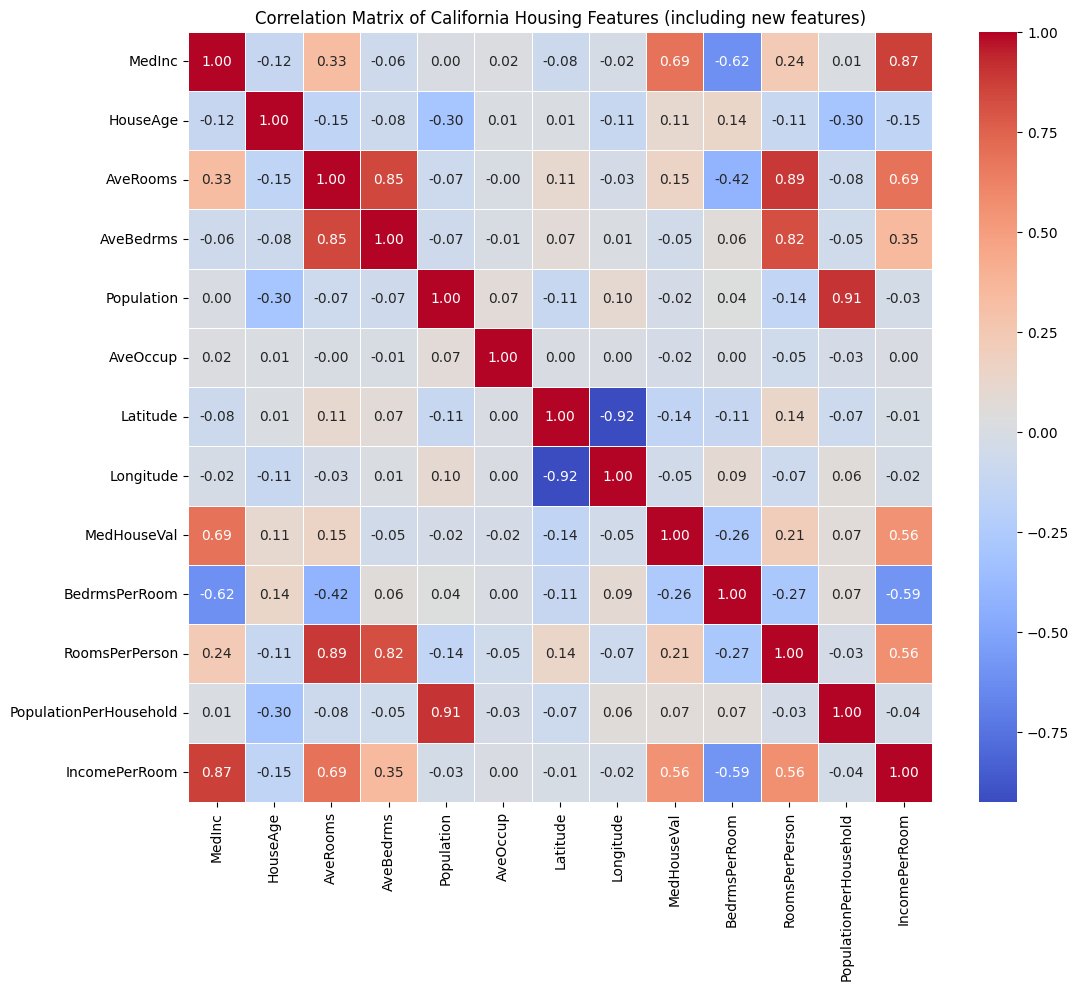

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation of all features with the target variable
print("Correlation with MedHouseVal (Target Variable):\n")
display(corr_matrix['MedHouseVal'].sort_values(ascending=False))

# Visualize the full correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of California Housing Features (including new features)')
plt.show()

### Distribution Analysis of New Features

Next, let's visualize the distributions of the newly created features to check their shape, skewness, and identify any potential outliers. We'll use histograms and Kernel Density Estimates (KDEs).

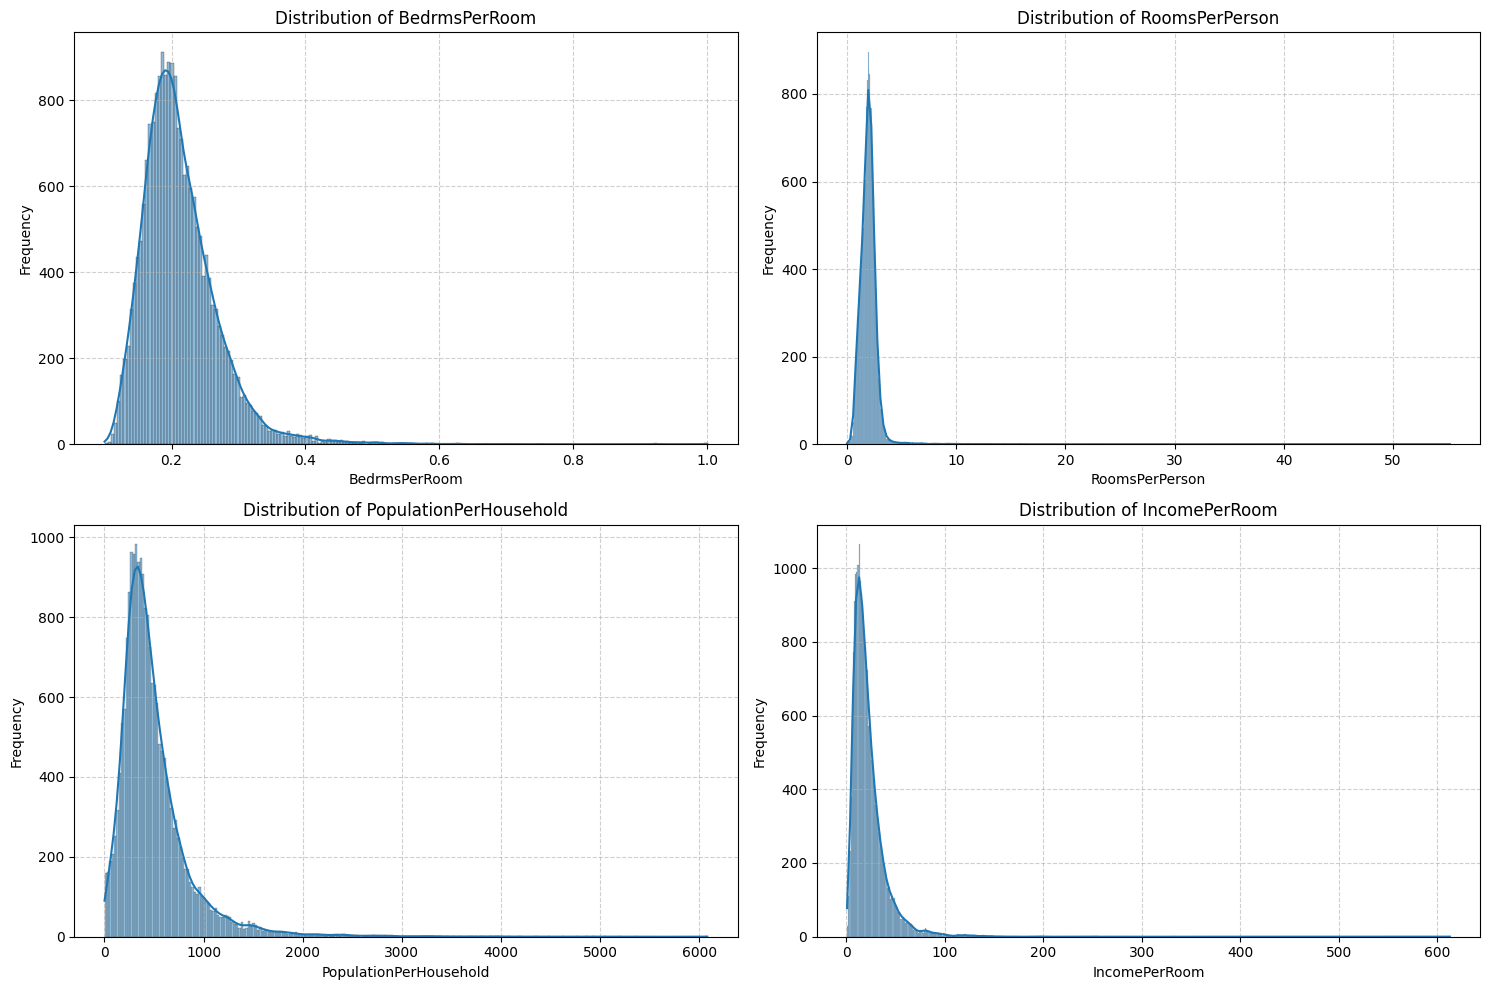

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

new_features = ['BedrmsPerRoom', 'RoomsPerPerson', 'PopulationPerHousehold', 'IncomePerRoom']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(new_features):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Feature Selection: Removing Low-Correlated Features

Based on the correlation analysis, we will now remove features that exhibit a very low absolute correlation with the target variable (`MedHouseVal`). This step aims to simplify the model, potentially reduce noise, and focus on the most impactful features.

In [7]:
# Define a correlation threshold
correlation_threshold = 0.05

# Get the absolute correlations with MedHouseVal
absolute_correlations = corr_matrix['MedHouseVal'].abs().sort_values(ascending=False)

# Identify features to keep (including the target itself temporarily for calculation)
features_to_keep = absolute_correlations[absolute_correlations >= correlation_threshold].index.tolist()

# Remove the target variable from the list of features to keep, as it's not a feature
if 'MedHouseVal' in features_to_keep:
    features_to_keep.remove('MedHouseVal')

# Identify features to drop
features_to_drop = [col for col in df.columns if col not in features_to_keep and col != 'MedHouseVal']

print(f"Features with absolute correlation less than {correlation_threshold} to MedHouseVal:\n{features_to_drop}\n")

# Drop the identified features from the DataFrame
df_selected = df[features_to_keep + ['MedHouseVal']].copy()

print("DataFrame after dropping low-correlated features:")
display(df_selected.head())
display(df_selected.info())

Features with absolute correlation less than 0.05 to MedHouseVal:
['AveBedrms', 'Population', 'AveOccup', 'Longitude']

DataFrame after dropping low-correlated features:


,MedInc,IncomePerRoom,BedrmsPerRoom,RoomsPerPerson,AveRooms,Latitude,HouseAge,PopulationPerHousehold,MedHouseVal
0,8.3252,58.144254,0.146591,2.732919,6.984127,37.88,41.0,126.0,4.526
1,8.3014,51.785271,0.155797,2.956685,6.238137,37.86,21.0,1138.0,3.585
2,7.2574,60.150315,0.129516,2.957661,8.288136,37.85,52.0,177.0,3.521
3,5.6431,32.827897,0.184458,2.283154,5.817352,37.85,52.0,219.0,3.413
4,3.8462,24.161264,0.172096,2.879646,6.281853,37.85,52.0,259.0,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MedInc                  20640 non-null  float64
 1   IncomePerRoom           20640 non-null  float64
 2   BedrmsPerRoom           20640 non-null  float64
 3   RoomsPerPerson          20640 non-null  float64
 4   AveRooms                20640 non-null  float64
 5   Latitude                20640 non-null  float64
 6   HouseAge                20640 non-null  float64
 7   PopulationPerHousehold  20640 non-null  float64
 8   MedHouseVal             20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

### Feature Scaling and Transformation

To ensure our models perform optimally, we will scale our features and apply a power transformation to handle skewness. We'll use the `Yeo-Johnson` transformation, which is suitable for data containing zero or negative values, followed by `StandardScaler`.

In [8]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_selected.drop('MedHouseVal', axis=1)
y = df_selected['MedHouseVal']

# Split data into training and testing sets before scaling/transformation to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PowerTransformer for Yeo-Johnson transformation
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Apply Yeo-Johnson transformation to the training data
X_train_transformed = yeo_johnson_transformer.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_transformed = yeo_johnson_transformer.transform(X_test)

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the transformed training data
X_train_scaled = scaler.fit_transform(X_train_transformed)

# Apply the same scaler to the transformed test data
X_test_scaled = scaler.transform(X_test_transformed)

# Convert back to DataFrame for easier inspection (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Features scaled and transformed successfully!")

# Display the first few rows of the scaled and transformed training features
display(X_train_scaled_df.head())

# Display descriptive statistics of the scaled and transformed training features
display(X_train_scaled_df.describe())

Features scaled and transformed successfully!


,MedInc,IncomePerRoom,BedrmsPerRoom,RoomsPerPerson,AveRooms,Latitude,HouseAge,PopulationPerHousehold
14196,-0.161740,-0.153965,-0.059092,-0.834511,-0.097478,-1.676816,0.382690,0.596403
8267,0.179598,-0.089977,0.569509,0.922565,-0.541928,-0.889177,1.549470,0.913420
17445,0.369121,0.396352,-0.686906,0.318120,0.344298,-0.335480,-2.137484,-0.321540
14265,-1.246018,-1.284167,0.978310,-1.614469,-0.985317,-1.693213,0.608449,-0.245214
2271,0.026281,0.317435,-0.520391,1.082553,0.722817,0.682840,1.121965,-0.149364


,MedInc,IncomePerRoom,BedrmsPerRoom,RoomsPerPerson,AveRooms,Latitude,HouseAge,PopulationPerHousehold
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-1.893404e-17,-6.454785e-18,2.302207e-17,-1.613696e-17,1.245236e-17,2.183869e-17,3.937419e-17,-3.657712e-18
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-3.427962e+00,-4.053452e+00,-3.318400e+00,-5.537415e+00,-7.468943e+00,-1.809732e+00,-2.494901e+00,-4.396989e+00
25%,-6.726230e-01,-6.641215e-01,-6.686845e-01,-5.242305e-01,-5.608758e-01,-7.830038e-01,-8.160930e-01,-5.673684e-01
50%,2.112207e-02,6.327694e-04,-1.065578e-02,1.356688e-01,6.375229e-02,-5.734561e-01,7.549773e-02,-4.045804e-02
75%,6.741822e-01,6.650821e-01,6.853490e-01,6.086457e-01,6.024644e-01,1.030085e+00,6.828965e-01,5.522728e-01
max,3.149433e+00,4.206546e+00,3.335892e+00,7.291417e+00,6.815226e+00,2.085056e+00,1.759418e+00,5.454862e+00


### Distribution Analysis of Scaled and Transformed Features

Let's visualize the distributions of a few selected features from the scaled and transformed training data (`X_train_scaled_df`) to observe the effect of the `Yeo-Johnson` transformation and `StandardScaler`. We expect these distributions to be more symmetric and closer to a normal distribution.

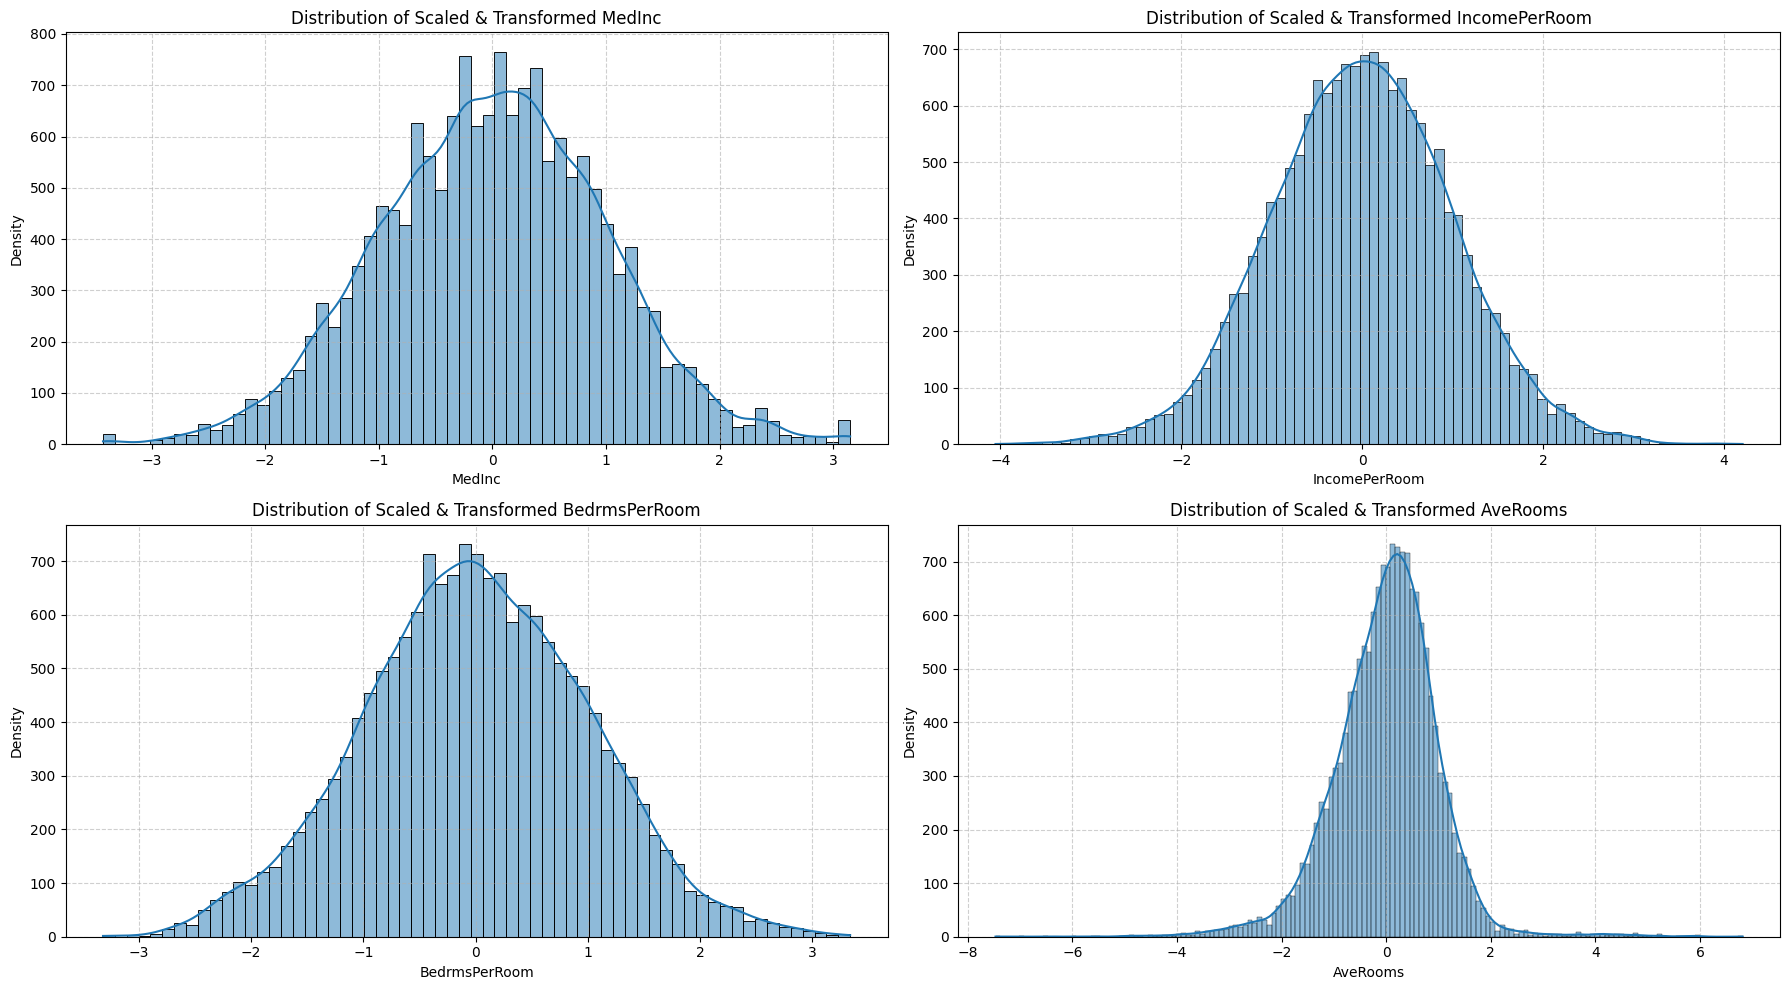

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few features to visualize their distributions after scaling and transformation
# It's good to pick some features that were skewed initially
features_to_plot = ['MedInc', 'IncomePerRoom', 'BedrmsPerRoom', 'AveRooms']

plt.figure(figsize=(18, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.histplot(X_train_scaled_df[feature], kde=True)
    plt.title(f'Distribution of Scaled & Transformed {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
# TODO: Step 3 - Train multiple models


### Training Multiple Models

Now that our data is preprocessed, we will train at least three different regression models to compare their performance. We will use `Linear Regression`, `Ridge Regression`, `Decision Tree Regressor`, and `Random Forest Regressor` as our candidate models.

In [10]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    model_performance[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Display overall performance results
print("\n--- Model Performance Summary ---")
performance_df = pd.DataFrame(model_performance).T
display(performance_df.sort_values(by='R2', ascending=False))


Training Linear Regression...
Linear Regression - MAE: 0.5745, MSE: 0.5802, RMSE: 0.7617, R2: 0.5572

Training Ridge Regression...
Ridge Regression - MAE: 0.5745, MSE: 0.5802, RMSE: 0.7617, R2: 0.5572

Training Decision Tree Regressor...
Decision Tree Regressor - MAE: 0.5629, MSE: 0.6903, RMSE: 0.8308, R2: 0.4732

Training Random Forest Regressor...
Random Forest Regressor - MAE: 0.4083, MSE: 0.3532, RMSE: 0.5943, R2: 0.7305

--- Model Performance Summary ---


,MAE,MSE,RMSE,R2
Random Forest Regressor,0.408303,0.353198,0.594305,0.730467
Ridge Regression,0.574492,0.580224,0.761725,0.557219
Linear Regression,0.574467,0.580232,0.761730,0.557213
Decision Tree Regressor,0.562888,0.690299,0.830842,0.473219


### Summary of Analysis and Initial Model Performance

1.  **Feature Engineering & Correlation:** Our new feature `IncomePerRoom` showed a strong positive correlation (0.55) with `MedHouseVal`, making it a highly predictive addition. We also successfully removed low-correlated features (`AveBedrms`, `Population`, `AveOccup`, `Longitude`) to streamline the dataset.

2.  **Data Transformation:** The `Yeo-Johnson` transformation and `StandardScaler` effectively made our feature distributions more symmetric and Gaussian-like, preparing them well for modeling.

3.  **Initial Model Performance:**

    | Model                     | MAE      | RMSE     | R2       |
    | :------------------------ | :------- | :------- | :------- |
    | **Random Forest Regressor** | **0.4083** | **0.5943** | **0.7305** |
    | Ridge Regression          | 0.5745   | 0.7617   | 0.5572   |
    | Linear Regression         | 0.5745   | 0.7617   | 0.5572   |
    | Decision Tree Regressor   | 0.5629   | 0.8308   | 0.4732   |

    The **Random Forest Regressor** is the clear standout, achieving the highest R-squared (0.7305) and lowest error metrics. This indicates it explains approximately 73% of the variance in median house values and is our best-performing model *before cross-validation*.

Our next step is to perform cross-validation to get a more robust estimate of model performance.

In [ ]:
# TODO: Step 4 - Cross-validation and comparison


### Step 4: Perform K-Fold Cross-Validation

To get a more robust estimate of our models' performance and ensure their generalization ability, we will perform 10-fold cross-validation. This technique splits the data into 10 folds, trains the model on 9 folds, and evaluates it on the remaining fold, repeating this process 10 times and averaging the results. This helps mitigate the variance that can arise from a single train-test split.

In [11]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
import numpy as np
import pandas as pd

# Initialize KFold for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store cross-validation results
cv_results = {}

# Metrics to evaluate during cross-validation
scoring = {'r2': 'r2', 'neg_mae': 'neg_mean_absolute_error', 'neg_mse': 'neg_mean_squared_error'}

print("--- Performing 10-Fold Cross-Validation ---")

for name, model in models.items():
    print(f"\nCross-validating {name}...")

    # Perform cross-validation
    scores = cross_validate(model, X_train_scaled, y_train, cv=kf, scoring=scoring, n_jobs=-1)

    # Calculate mean and std for each metric
    mean_r2 = scores['test_r2'].mean()
    std_r2 = scores['test_r2'].std()
    mean_mae = -scores['test_neg_mae'].mean() # Convert back to positive MAE
    std_mae = scores['test_neg_mae'].std()
    mean_mse = -scores['test_neg_mse'].mean() # Convert back to positive MSE
    std_mse = scores['test_neg_mse'].std()
    mean_rmse = np.sqrt(mean_mse)

    cv_results[name] = {
        'Mean R2': mean_r2,
        'Std R2': std_r2,
        'Mean MAE': mean_mae,
        'Std MAE': std_mae,
        'Mean MSE': mean_mse,
        'Std MSE': std_mse,
        'Mean RMSE': mean_rmse
    }

    print(f"{name} - Mean R2: {mean_r2:.4f} (Std: {std_r2:.4f}), Mean MAE: {mean_mae:.4f} (Std: {std_mae:.4f}), Mean RMSE: {mean_rmse:.4f}")

# Display overall cross-validation results
print("\n--- Cross-Validation Performance Summary ---")
cv_performance_df = pd.DataFrame(cv_results).T
display(cv_performance_df.sort_values(by='Mean R2', ascending=False))

--- Performing 10-Fold Cross-Validation ---

Cross-validating Linear Regression...
Linear Regression - Mean R2: 0.5729 (Std: 0.0207), Mean MAE: 0.5713 (Std: 0.0167), Mean RMSE: 0.7556

Cross-validating Ridge Regression...
Ridge Regression - Mean R2: 0.5729 (Std: 0.0206), Mean MAE: 0.5714 (Std: 0.0167), Mean RMSE: 0.7555

Cross-validating Decision Tree Regressor...
Decision Tree Regressor - Mean R2: 0.4582 (Std: 0.0233), Mean MAE: 0.5697 (Std: 0.0190), Mean RMSE: 0.8509

Cross-validating Random Forest Regressor...
Random Forest Regressor - Mean R2: 0.7340 (Std: 0.0157), Mean MAE: 0.4126 (Std: 0.0161), Mean RMSE: 0.5962

--- Cross-Validation Performance Summary ---


,Mean R2,Std R2,Mean MAE,Std MAE,Mean MSE,Std MSE,Mean RMSE
Random Forest Regressor,0.734013,0.015687,0.412646,0.016073,0.355498,0.024911,0.596237
Ridge Regression,0.572889,0.020608,0.571450,0.016713,0.570831,0.034873,0.755534
Linear Regression,0.572858,0.020693,0.571295,0.016743,0.570878,0.035037,0.755564
Decision Tree Regressor,0.458167,0.023263,0.569682,0.019028,0.723955,0.037558,0.850855


In [ ]:
# TODO: Step 5 - Visualize results


### Step 5: Visualize Model Comparison Results

To effectively compare the performance of our models after cross-validation, we will create bar plots for the key metrics: Mean R-squared (R2), Mean Mean Absolute Error (MAE), and Mean Root Mean Squared Error (RMSE). This visual representation will help in quickly identifying the best-performing models.

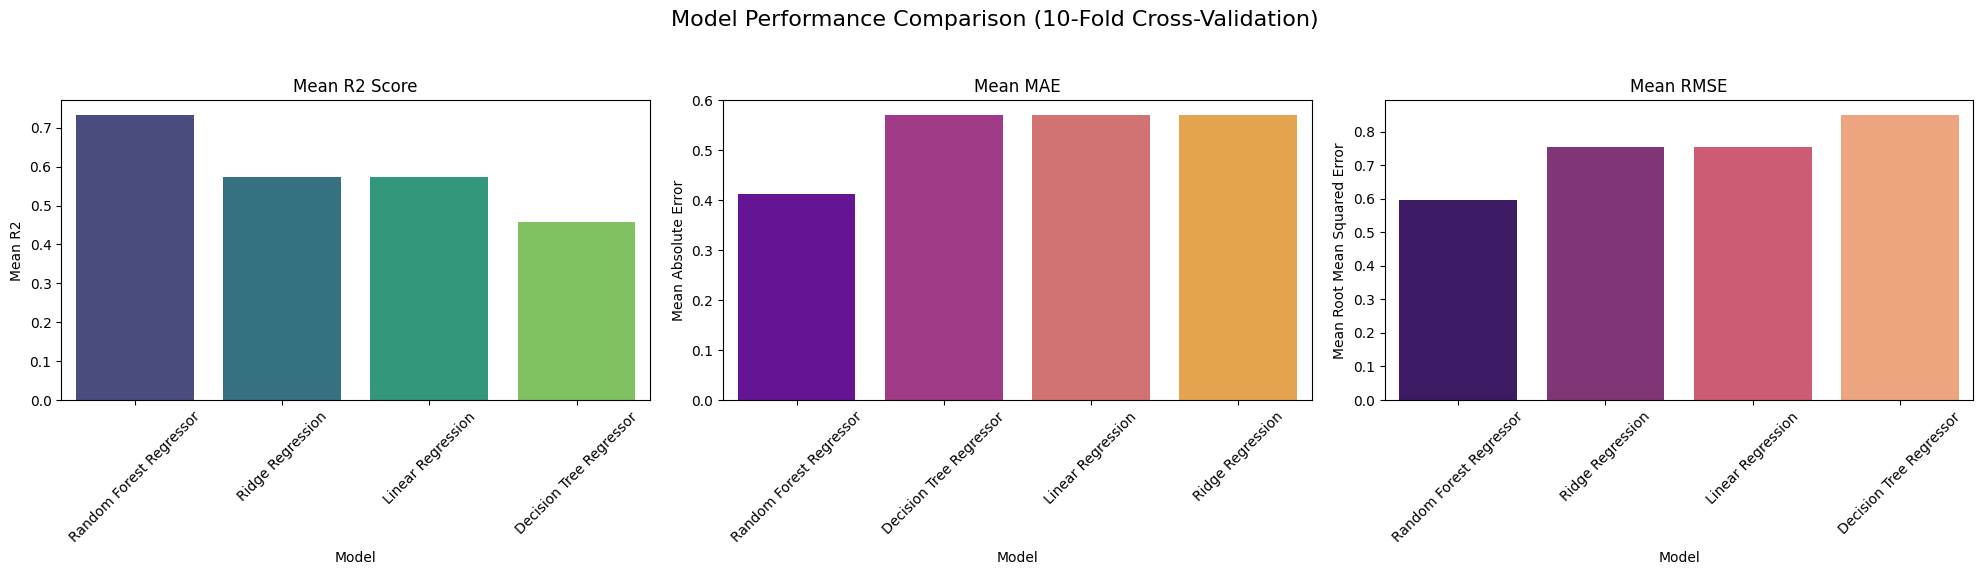

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the cv_results dictionary to a DataFrame for easier plotting
cv_performance_df = pd.DataFrame(cv_results).T.reset_index()
cv_performance_df = cv_performance_df.rename(columns={'index': 'Model'})

# Set up the plot layout
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Comparison (10-Fold Cross-Validation)', fontsize=16)

# Plot Mean R2
sns.barplot(ax=axes[0], x='Model', y='Mean R2', data=cv_performance_df.sort_values(by='Mean R2', ascending=False), palette='viridis', hue='Model', legend=False)
axes[0].set_title('Mean R2 Score')
axes[0].set_ylabel('Mean R2')
axes[0].tick_params(axis='x', rotation=45)

# Plot Mean MAE
sns.barplot(ax=axes[1], x='Model', y='Mean MAE', data=cv_performance_df.sort_values(by='Mean MAE', ascending=True), palette='plasma', hue='Model', legend=False)
axes[1].set_title('Mean MAE')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].tick_params(axis='x', rotation=45)

# Plot Mean RMSE
sns.barplot(ax=axes[2], x='Model', y='Mean RMSE', data=cv_performance_df.sort_values(by='Mean RMSE', ascending=True), palette='magma', hue='Model', legend=False)
axes[2].set_title('Mean RMSE')
axes[2].set_ylabel('Mean Root Mean Squared Error')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---
## Task 2: Ensemble Methods

Implement and compare ensemble learning techniques.

**Requirements:**
- Choose a dataset (classification or regression)
- Implement bagging (Random Forest or similar)
- Implement boosting (AdaBoost, Gradient Boosting, or XGBoost)
- Implement stacking with multiple base models
- Compare all approaches with baseline single model
- Analyze feature importance

In [ ]:
# TODO: Step 1 - Load dataset

In [ ]:
# TODO: Step 2 - Implement bagging

In [ ]:
# TODO: Step 3 - Implement boosting

In [ ]:
# TODO: Step 4 - Implement stacking

In [ ]:
# TODO: Step 5 - Compare with baseline

In [ ]:
# TODO: Step 6 - Feature importance analysis

---
## Task 3: Hyperparameter Tuning and Model Optimization

Optimize a machine learning model through systematic hyperparameter tuning.

**Requirements:**
- Select a dataset and model type
- Implement Grid Search or Random Search
- Use cross-validation for evaluation
- Compare at least 5 different hyperparameter combinations
- Visualize the effect of different hyperparameters
- Report best model performance on test set

In [ ]:
# TODO: Step 1 - Load dataset and choose model

In [ ]:
# TODO: Step 2 - Define hyperparameter grid

In [ ]:
# TODO: Step 3 - Perform grid/random search

In [ ]:
# TODO: Step 4 - Analyze hyperparameter effects

In [ ]:
# TODO: Step 5 - Test best model